--- In this notebook, I explain how to build a simple linear regression model using python.

--- In regression analysis we try to predict the value of a variable (outcome) based on a single predictor variable.

--- I am using a simple dataset from kaggle 

--- The data contains the variables

   Gender

   Height (m)

   Weight (kg)
   

Let's start with the following steps:

--- Importing the main packages
--- Importing data using the pandas library
--- Understanding the structure of the data


In [1]:
## import libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy import stats
import statsmodels
from statsmodels.stats.stattools import durbin_watson

In [2]:
#import data
data = pd.read_csv("weight-height.csv")

In [3]:
data.head(5)

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
data.tail(5)

,Gender,Height,Weight
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461
9999,Female,61.944246,113.649103


In [5]:
data.shape

(10000, 3)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [7]:
data.columns

Index(['Gender', 'Height', 'Weight'], dtype='object')

Here we see that the dataset contains 10000 observations for each of the 3 three variables. Also we see the names of the variables. The variable Weight is the one we have to predict. This means that this is a numerical variable containing a decimal. The  Weight can be predicted to make use of the following predictors: Height and age.

Data cleaning

In [8]:
# Checking Null values
data.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

Our dataset is correct,there is nothing to change.
Lets see the data types for each column

In [9]:
data.dtypes

Gender     object
Height    float64
Weight    float64
dtype: object

Lets explore our dataset. We start with the variable that we want to predict


In [10]:
#descriptive statistics summary
data['Weight'].describe()

count    10000.000000
mean       161.440357
std         32.108439
min         64.700127
25%        135.818051
50%        161.212928
75%        187.169525
max        269.989699
Name: Weight, dtype: float64

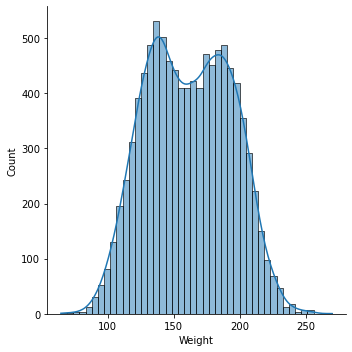

In [11]:
#histogram
sns.displot(data['Weight'], kde=True)

In [12]:
#skewness and kurtosis
print("Skewness: %f" % data['Weight'].skew())
print("Kurtosis: %f" % data['Weight'].kurt())

Skewness: 0.032955
Kurtosis: -0.794618


We notice that the distribution of Weight  does not differ significantly from the normal distribution. Something that we can see from the skewness and kurtosis values. We continue our analysis with variable Height

In [13]:
data['Height'].describe()


count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

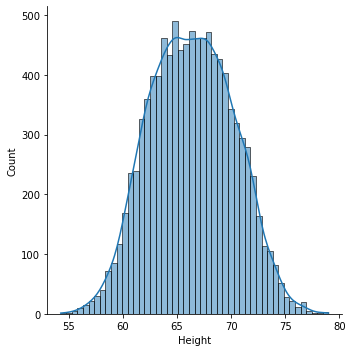

In [14]:
#histogram
sns.displot(data['Height'], kde=True)

In [15]:
#skewness and kurtosis
print("Skewness: %f" % data['Height'].skew())
print("Kurtosis: %f" % data['Height'].kurt())

Skewness: 0.049369
Kurtosis: -0.474134


We notice that the distribution of Weight  does not differ significantly from the normal distribution. Something that we can see from the skewness and kurtosis values.

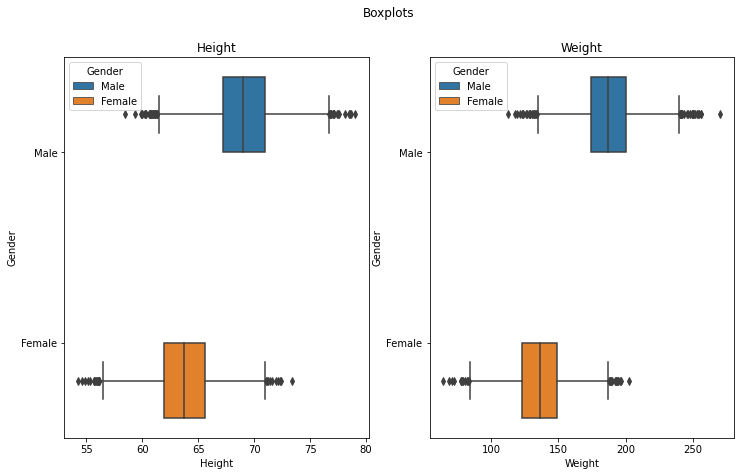

In [16]:
#Boxplots for Height and Weight
fig, axs = plt.subplots(1,2, figsize = (12,7))
fig.suptitle('Boxplots')
axs[0].set_title('Height')
axs[1].set_title('Weight')
plt1 = sns.boxplot(data=data,x=data['Height'], y="Gender",hue="Gender", ax = axs[0])
plt2 = sns.boxplot(data=data,x=data['Weight'], y="Gender",hue="Gender", ax = axs[1])

From the two boxplots , both Height and Weight seem to have outliers but they are not significant. Also we notice that men are taller and heavier than women.

 We check about the relation between the Height and Weight.

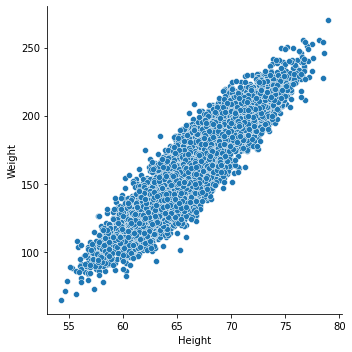

In [17]:
#Scatteplot
sns.relplot(data=data, x=data['Height'], y=data['Weight'])

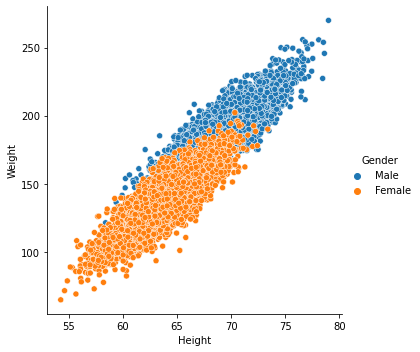

In [18]:
#Scatteplot
sns.relplot(data=data, x=data['Height'], y=data['Weight'],hue="Gender")

From the  plots above, weight and height are highly dependent on each other,as height increases , weight also increases.From the second plot we can ascertain again (boxplots) that men are taller and heavier than women.

The  analysis above show us the structure of our dataset and more particularly based on the strong relation between the variables Weight and Height , we will build the regression model. As the purpose of this notebook is to show the simple regression analysis model, we won't use the independent variable Gender but only the independent variable Height to predict the outcome

---WE won't use the splitting method but we fit our model using all the data

In [19]:
#independent variable Weight 
X = data['Height'].values
print(X)
# We  add the constant b0 in our model y = b0+b1x i (first  column of x_con)
x_con = sm.add_constant(X) 
print(x_con)

[73.84701702 68.78190405 74.11010539 ... 63.86799221 69.03424313
 61.94424588]
[[ 1.         73.84701702]
 [ 1.         68.78190405]
 [ 1.         74.11010539]
 ...
 [ 1.         63.86799221]
 [ 1.         69.03424313]
 [ 1.         61.94424588]]


In [20]:
Y = data['Weight'].values
print(Y[0:100])


[241.89356318 162.31047252 212.74085556 220.0424703  206.34980062
 152.21215576 183.9278886  167.97111049 175.9294404  156.39967639
 186.60492556 213.74116949 167.12746107 189.44618139 186.43416802
 172.18693006 196.02850633 172.88347021 185.98395757 182.42664801
 174.11592908 197.73142161 149.17356601 228.76178062 162.00665185
 192.34397658 184.43517441 206.82818942 175.2139224  154.34263893
 187.50684316 212.91022533 195.03224323 205.18362134 204.16412548
 192.90351507 197.4882426  183.81097323 163.85182488 163.10801715
 172.13559741 194.0454049  168.6177462  161.1934326  164.66027726
 188.92230315 187.06055216 209.07086339 192.01433541 211.34249682
 165.61162618 201.0719181  173.42396035 181.40767929 169.7377074
 163.30952831 189.71020994 192.12484735 198.19846411 209.52649984
 198.75979266 198.07952365 195.29061219 164.943303   179.86390234
 155.25042069 184.51939125 220.67804147 183.31265531 196.45131229
 184.5956083  207.53283852 177.20092875 163.10800221 216.21823011
 204.655493

In [21]:
# Fit the model 
model = sm.OLS(Y, x_con).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                 5.904e+04
Date:                Thu, 27 Apr 2023   Prob (F-statistic):               0.00
Time:                        01:06:27   Log-Likelihood:                -39219.
No. Observations:               10000   AIC:                         7.844e+04
Df Residuals:                    9998   BIC:                         7.846e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -350.7372      2.111   -166.109      0.000    -354.876    -346.598
x1             7.7173      0.032    242.975      0.000       7.655       7.780
==============================================================================
Omnibus:                        2.141   Durbin-Watson:                   1.677
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                2.150
Skew:                           0.036   Prob(JB):                        0.341
Kurtosis:                       2.991   Cond. No.                     1.15e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

---The relation between the independent variable height (x) and dependent variable weight (y) is described by the simple  linear regression model with  regression line  y =  -350.7372 + 7.7173x ( y= b_0 +b_1x )

--- The intercept (“constant”) in a regression model represents the mean value of the response variable when the  predictor variable in the model is equal to zero ,in our case we have that intercept b_0 = -350.7372.
We can say that for zero height the estimated mean of weight equals to -350.7372 , something that is not realistic.

--- About the slope of least squared line we observe that b_1 = 7.7173, we conclude that if we would increase by 1 unit the height, then the estimated increase in average weight volume would be  0.032.

--- In the output, b_1 = 7.7173 and the estimated standard error of b_1 shown as 0.032. It is clear from the output that the value of the test statistic about height equals to 242.975 and the p-value for the two-tailed  test  alternative Ha: b_1 /= 0 , labeled as P, is too small.We can reject the hypothesis that height has no effect on weight .We could predict that b_1 values yields within the [-354.876 ,-346.598] ( 95% Confidence interval of b_1).

--- In the output, b_0 = -350.7372  and the estimated standard error of b_0 shown as 2.111. It is clear from the output that the value of the test statistic about intercept equals to -166.109 and the p-value for the two-tailed  test  alternative Ha: b_0 /= 0 , labeled as P, is too small. We can reject the hypothesis that intercept equals to zero .We could predict that b_0 values yields within the [7.655,7.780] (95% Confidence interval of b_0).

--- Also the value of R-squared is  0.855 that means the 86% of the variation in Y is explained by X.This measure is called the coefficient of determination, R^2 , which is the ratio of explained variation, compared to the total variation, i.e. the proportion of variation in Y that is explained by X in our regression model.

--- Another way to see if the independent variables is significantly related to
the dependent variable (Y) is the Ftest ,  H_0: b_1=0 with  alternative H_a: b_1 /= 0 . The Ftest give us p-value < 0.05 so we can reject the hypothesis that height has no effect on weight. In simple linear regression model Ttest and Ftest are the same.  



we will predict Y for the existing values of X :

In [22]:
predictions = model.get_prediction(x_con)
pred = predictions.summary_frame(alpha=0.05)
pred

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,219.161480,0.267146,218.637819,219.685141,195.202502,243.120458
1,180.072546,0.144266,179.789755,180.355337,156.117622,204.027470
2,221.191809,0.274604,220.653530,221.730087,197.232507,245.151111
3,202.831401,0.209647,202.420451,203.242352,178.874622,226.788181
4,188.560728,0.165502,188.236310,188.885145,164.605276,212.516179
...,...,...,...,...,...,...
9995,159.936199,0.122355,159.696359,160.176038,135.981743,183.890654
9996,166.839332,0.124202,166.595871,167.082792,142.884840,190.793824
9997,142.150475,0.145723,141.864829,142.436122,118.195517,166.105433
9998,182.019919,0.148681,181.728474,182.311365,158.064892,205.974947


For every prediction of Y we also see the mean_se , the Confidence intervals and the Prediction intervals.
Plot of the first 199 obeservations

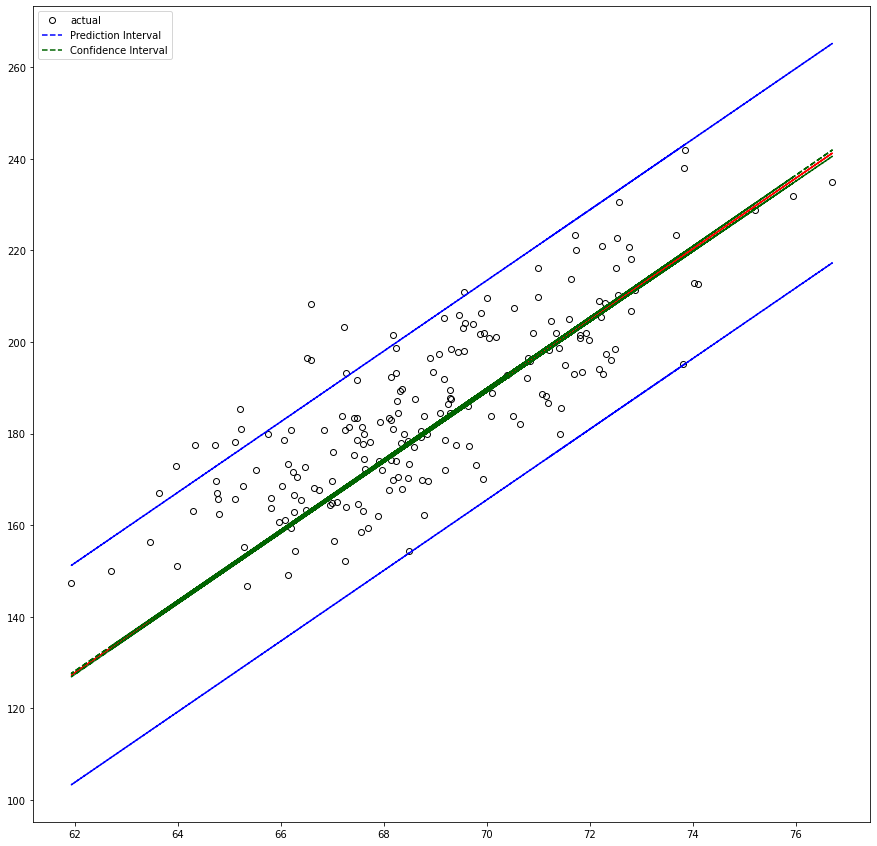

In [23]:

y_prd = pred['mean'][0:200]
yprd_ci_lower = pred['obs_ci_lower'][0:200]
yprd_ci_upper = pred['obs_ci_upper'][0:200]
ym_ci_lower = pred['mean_ci_lower'][0:200]
ym_ci_upper = pred['mean_ci_upper'][0:200]
plt.figure(num = 1, figsize=(15,15))
plt.plot(X[0:200], Y[0:200], linestyle = "None", marker = "o",markerfacecolor = "None", color = "black",label = "actual")
plt.plot(X[0:200], y_prd, color = "red")
plt.plot(X[0:200], yprd_ci_lower, color = "blue", linestyle = "--",label = "Prediction Interval")
plt.plot(X[0:200], yprd_ci_upper, color = "blue", linestyle = "--")
plt.plot(X[0:200], ym_ci_lower, color = "darkgreen", linestyle = "--", label = "Confidence Interval")
plt.plot(X[0:200], ym_ci_upper, color = "darkgreen", linestyle = "--")
plt.legend()
plt.show()

Lets create some new points and predict them  with our model .

In [24]:
xnew = np.linspace(start = 65, stop = 70, num = 100) # 10 xnew
e = np.random.normal(loc = 0, scale = 2, size = 100) # noise
xnew= xnew+e
xnew

array([65.12203145, 64.04602541, 63.14595168, 68.36046483, 63.35362111,
       66.4098377 , 66.27413367, 64.46292529, 59.62675537, 64.08210157,
       67.51786595, 67.84859948, 65.93470089, 64.72640753, 65.64543286,
       68.33155288, 64.32125052, 67.30205112, 66.18133073, 62.78404341,
       64.11958186, 65.6047624 , 66.25813857, 67.88677438, 63.78420252,
       65.46067985, 65.61184716, 64.86984881, 66.91927587, 66.79611597,
       67.51071742, 67.14271939, 68.09077286, 66.93197175, 66.81814839,
       66.84719645, 64.6324216 , 63.64531353, 66.91907899, 64.19564958,
       65.81008307, 65.99469739, 65.65363519, 66.74647156, 66.87489542,
       66.54549093, 66.83334232, 69.9386857 , 66.90929896, 66.20664981,
       67.42235303, 68.24939741, 68.48197097, 65.10689041, 65.13726107,
       69.59850443, 68.58670809, 72.38197785, 66.29829392, 65.34492274,
       67.37780492, 68.7940928 , 68.60419321, 68.81018895, 69.62025775,
       67.86646682, 70.75860073, 70.74317331, 70.70312998, 70.13

In [25]:
# We  add the constant b0 in our model y = b0+b1x i (first  column of x_con)
xnew = sm.add_constant(xnew)
xnew

array([[ 1.        , 65.12203145],
       [ 1.        , 64.04602541],
       [ 1.        , 63.14595168],
       [ 1.        , 68.36046483],
       [ 1.        , 63.35362111],
       [ 1.        , 66.4098377 ],
       [ 1.        , 66.27413367],
       [ 1.        , 64.46292529],
       [ 1.        , 59.62675537],
       [ 1.        , 64.08210157],
       [ 1.        , 67.51786595],
       [ 1.        , 67.84859948],
       [ 1.        , 65.93470089],
       [ 1.        , 64.72640753],
       [ 1.        , 65.64543286],
       [ 1.        , 68.33155288],
       [ 1.        , 64.32125052],
       [ 1.        , 67.30205112],
       [ 1.        , 66.18133073],
       [ 1.        , 62.78404341],
       [ 1.        , 64.11958186],
       [ 1.        , 65.6047624 ],
       [ 1.        , 66.25813857],
       [ 1.        , 67.88677438],
       [ 1.        , 63.78420252],
       [ 1.        , 65.46067985],
       [ 1.        , 65.61184716],
       [ 1.        , 64.86984881],
       [ 1.        ,

In [26]:
# Predictions for xnew
predictions2 = model.get_prediction(xnew)
pred2 = predictions2.summary_frame(alpha=0.05)
pred2

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,151.828257,0.128442,151.576485,152.080029,127.873679,175.782834
1,143.524409,0.142721,143.244646,143.804171,119.569520,167.479297
2,136.578281,0.159382,136.265861,136.890701,112.622989,160.533573
3,176.820179,0.137619,176.550418,177.089939,152.865405,200.774952
4,138.180925,0.155229,137.876645,138.485206,114.225738,162.136113
...,...,...,...,...,...,...
95,195.313523,0.185385,194.950131,195.676915,171.357512,219.269534
96,183.634125,0.152564,183.335069,183.933180,159.679003,207.589246
97,195.532506,0.186064,195.167784,195.897228,171.576475,219.488537
98,212.089907,0.241633,211.616258,212.563555,188.131970,236.047844


Regression normality:

In [27]:
len(model.resid)

10000

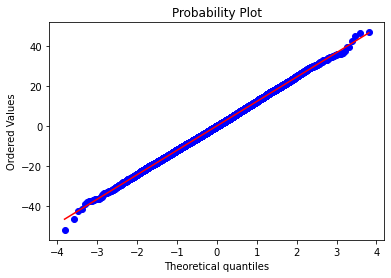

In [28]:
stats.probplot(model.resid, dist="norm", plot=plt)
plt.show()

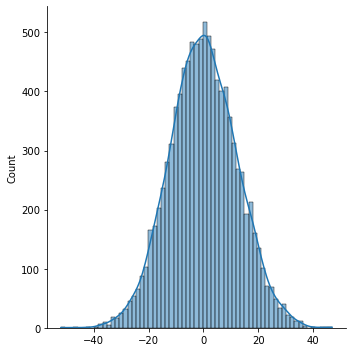

In [29]:
sns.displot(model.resid, kde=True)

The histogram and Q-Q plot indicate that the residuals may be from a normal
distribution.

Residual Normality Testing:
H_0 : residuals follow a normal distribution
H_1 : residuals do not follow a normal distribution

In [30]:
#Shapiro-Wilk Test
print(stats.shapiro(x = model.resid))
print('-----------------------------')
# Kolmogorov-Smirnov Test
print('Kolmogorov-Smirnov Test',statsmodels.stats.diagnostic.kstest_normal(x = model.resid, dist = "norm")) #statistic and p-value

ShapiroResult(statistic=0.999764084815979, pvalue=0.33332496881484985)
-----------------------------
Kolmogorov-Smirnov Test (0.00835486475515923, 0.08450860209850398)


/usr/lib/python3/dist-packages/scipy/stats/_morestats.py:1761: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Homoskedasticity

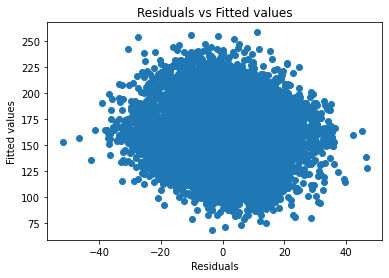

In [31]:
plt.scatter(model.resid, pred['mean']) 

plt.title('Residuals vs Fitted values')
plt.xlabel('Residuals')
plt.ylabel('Fitted values')
plt.show()

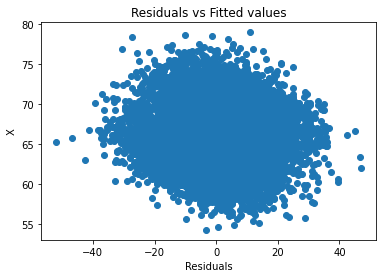

In [32]:
plt.scatter(model.resid, X ) 

plt.title('Residuals vs Fitted values')
plt.xlabel('Residuals')
plt.ylabel('X')
plt.show()

we do not see any non-random patterns in the scatterplots.

Residual Autocorrelation:

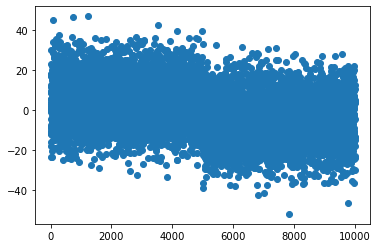

In [33]:
plt.scatter(np.linspace(start = 0 , stop = len(model.resid), num = len(model.resid)), model.resid)
plt.show()

we do not see any non-random patterns in thescatterplot.

Durbin-Watson Test for autocorrelation:

In [34]:
# Durbin–Watson Test
print(durbin_watson(model.resid))

1.6766849179044054
